<img src="saudi_logo.jpg" alt="a" align='center' style="width:300px;height:250px;">

<h2 style="color:#73C6B6;">Appendix</h2>

1. <a href=#imports >Imports</a>
2. <a href=#load>Load Data</a>        
3. <a href=#formating>Data Formating </a>         
4. <a href=#valid>Validate Assumption(Optional)</a>        
5. <a href=#EDA>Exploratory Data Analysis</a>
6. <a href=#baseline_model>Baseline Model</a>
7. <a href=#data_prep>Data Prep and Experimentation</a>
8. <a href=#conclusion>Conclusion</a>

<h2 style="color:#73C6B6;"> OverView</h2>

One of Saudi Arabia 2030 vision key initiatives is “Quality of life”. This initiative comes with the aim of diversifying and enriching the tourism and entertainment experience in the Kingdom. It improve the quality of life by developing the necessary environment to create more vibrant options that enhance the participation and experience of citizens, residents and visitors.

The Saudi Tourism Authority has launched tourism programs such as (Saudi Spirit), a deliberative platform which you can discover tourist destinations, events and seasons. Through the platform, visitors can find suitable packages and trips, and entertainment activities available such as AlUla Winter, Riyadh , Jeddah and Alahsa Seasons.

process of building a tool for tourism in KSA to predict the accommodation prices in riyals and given the number of beds, the rating score, and the number of reviews.

<h2 style="color:#73C6B6;">Problem Statment</h2>

In this time of the year, hotels and resorts are in high demand in the Kingdom. in this project we bulid a model to predict the prices in riyals, given the rating score, and the number of reviews.

<h2 style="color:#73C6B6;"> Data Description </h2> 

We webscraping the (booking) website and comind it with data from kggle.



<h2 style="color:#73C6B6;">Features </h2>

><p><b style="color:#148F77;">Hotel_Name : </b>Hotels Names in saudi<p/>
><b><b style="color:#148F77 ;">Price : </b> Price of this room in this period of time<p/>
><p><b style="color:#148F77 ;">Rating: </b> Hotel rating<p/>
><p><b style="color:#148F77 ;">rating_title: </b> Is it Excellent ,good ,very good etc….<p/>
><p><b style="color:#148F77 ;">Number_of_Ratings :  </b>people visit this hotel reviews<p/>
><p><b style="color:#148F77 ;">Room_type : </b> Type of room<p/>
><p><b style="color:#148F77 ;">Place: </b> Hotel location<p/>

<h2 style="color:#73C6B6;">Tools </h2>

Pandas , Selenium , Beautiful Soup , Sklearn.

## <a name='imports' style="color:#73C6B6;">Libraries Imports</a> 

In [2515]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import power_transform 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


C:\Users\abdol\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## <a name='load' style="color:#73C6B6;">Load Data</a> 

In [2516]:
df=pd.read_csv("reg1112.csv")

In [2517]:
df.location=df.location.str.strip()

In [2518]:
df2=pd.read_csv("hotels1.csv")

In [2519]:
df2

,Hotel_Name,Rating,Price,kind_rat,Reviews,Rooms
0,"Crowne Plaza Riyadh - RDC Hotel & Convention, ...",8.8,795,Excellent,2210,Deluxe King Room - Non-Smoking
1,"The Ritz-Carlton, Riyadh",8.6,999,Excellent,3395,"Deluxe, Guest room, 1 King"
2,Sheraton Riyadh Hotel & Towers,7.9,495,Good,938,"Classic Room, Guest room, 1 Queen"
3,"Radisson Blu Hotel, Riyadh",7.8,450,Good,2006,Standard Room
4,"Burj Rafal Riyadh, a Marriott International Hotel",7.9,975,Good,4617,"Deluxe, Guest room, 1 King, City view"
...,...,...,...,...,...,...
353,Al Nozul Al Zahabiya,7.3,300,Good,13,One-Bedroom Apartment
354,Davli Resort,7.0,1320,Good,6,One-Bedroom Chalet
355,شانتال Chantal,5.3,3000,Review score,4,Chalet
356,Luxurious villa,9.0,4000,Wonderful,6,Villa with Private Pool


## <a name='formating' style="color:#73C6B6;">Data Formating </a> 

In [2520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         899 non-null    object 
 1   location           899 non-null    object 
 2   price              899 non-null    int64  
 3   room_type          899 non-null    object 
 4   beds               899 non-null    int64  
 5   rating             899 non-null    float64
 6   rating_title       867 non-null    object 
 7   number_of_ratings  899 non-null    int64  
 8   per_night          899 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 63.3+ KB


In [2521]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hotel_Name  358 non-null    object 
 1   Rating      358 non-null    float64
 2   Price       358 non-null    int64  
 3   kind_rat    358 non-null    object 
 4   Reviews     358 non-null    int64  
 5   Rooms       358 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 16.9+ KB


In [2522]:
df[df.rating==0]

,hotel_name,location,price,room_type,beds,rating,rating_title,number_of_ratings,per_night
87,لوريت للشقق والاجنحة الفندقية,Jeddah,225,Junior Suite,1,0.0,NaN,0,1
115,رحاب الضيافة,Dammam,230,Two-Bedroom Apartment,6,0.0,NaN,0,1
119,شاليه وئام,Umm as Salam,650,One-Bedroom Chalet,2,0.0,NaN,0,1
130,دار اجواء 2,Riyadh,179,One-Bedroom Apartment,1,0.0,NaN,0,1
166,شاليهات نيو فيو الفندقيه,Taif,675,One-Bedroom Chalet,2,0.0,NaN,0,1
168,شاليه ودق,Buraydah,400,Double or Twin Room,2,0.0,NaN,0,1
188,فندق المحمل العصري,Sharurah Show on map,150,Double Room,1,0.0,NaN,0,1
199,شالية مارينا,Al Muwayh,1000,Two-Bedroom Chalet,3,0.0,NaN,0,1
200,استراحة الخير,Riyadh,240,Two-Bedroom Chalet,5,0.0,NaN,0,1
224,دار شيمة,An Nuqrah,130,Deluxe Double Room,2,0.0,NaN,0,1


In [2523]:
df=df.dropna()

In [2524]:
df2.rename(columns={'Hotel_Name': 'hotel_name','Rating':'rating', "Price":"price","kind_rat": "rating_title",
                    "Rooms":"room_type","Reviews":"number_of_ratings"} ,inplace=True)

In [2525]:
df.drop(['per_night', 'beds'], axis='columns', inplace=True)

In [2526]:
df

,hotel_name,location,price,room_type,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,7.5,Good,180
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",8.2,Very good,2947
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,7.5,Good,264
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,7.7,Good,3923
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",8.1,Very good,1032
...,...,...,...,...,...,...,...
893,Khabti Grand Hotel,Bishah,400,Budget Double Room,8.3,Very good,1310
894,Golden Sea Hotel,Obhor,340,Junior Suite,8.2,Very good,172
896,Golden Dune Hotel,Turayf,250,Small Double Room,9.0,Superb,1735
897,قصر البالود 2,Riyadh,127,Budget Double Room,8.9,Fabulous,228


In [2527]:
df2["location"] ="Riyadh" 


In [2528]:
df2

,hotel_name,rating,price,rating_title,number_of_ratings,room_type,location
0,"Crowne Plaza Riyadh - RDC Hotel & Convention, ...",8.8,795,Excellent,2210,Deluxe King Room - Non-Smoking,Riyadh
1,"The Ritz-Carlton, Riyadh",8.6,999,Excellent,3395,"Deluxe, Guest room, 1 King",Riyadh
2,Sheraton Riyadh Hotel & Towers,7.9,495,Good,938,"Classic Room, Guest room, 1 Queen",Riyadh
3,"Radisson Blu Hotel, Riyadh",7.8,450,Good,2006,Standard Room,Riyadh
4,"Burj Rafal Riyadh, a Marriott International Hotel",7.9,975,Good,4617,"Deluxe, Guest room, 1 King, City view",Riyadh
...,...,...,...,...,...,...,...
353,Al Nozul Al Zahabiya,7.3,300,Good,13,One-Bedroom Apartment,Riyadh
354,Davli Resort,7.0,1320,Good,6,One-Bedroom Chalet,Riyadh
355,شانتال Chantal,5.3,3000,Review score,4,Chalet,Riyadh
356,Luxurious villa,9.0,4000,Wonderful,6,Villa with Private Pool,Riyadh


In [2529]:

frames = [df, df2]

df_Hotels = pd.concat(frames)

In [2530]:
df_Hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 357
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         1225 non-null   object 
 1   location           1225 non-null   object 
 2   price              1225 non-null   int64  
 3   room_type          1225 non-null   object 
 4   rating             1225 non-null   float64
 5   rating_title       1225 non-null   object 
 6   number_of_ratings  1225 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 76.6+ KB


## <a name='valid' style="color:#73C6B6;">Validate Assumption(Optional)</a>

In [2531]:
df_Hotels.rating_title.value_counts()

Good            463
Review score    303
Very good       222
Fabulous         87
Very Good        70
Superb           38
Excellent        26
Exceptional      11
Wonderful         5
Name: rating_title, dtype: int64

In [2532]:
df_Hotels[(df_Hotels.rating==6.1)|(df_Hotels.rating==6.9)]

,hotel_name,location,price,room_type,rating,rating_title,number_of_ratings
8,Al Hayatt Plus,Riyadh,210,Economy Quadruple Room,6.9,Review score,2300
46,فندق العروبة,Riyadh,89,King Studio,6.1,Review score,2409
80,reef101,Riyadh,150,Studio,6.1,Review score,200
85,ريحانة الورد,Abha,88,Budget Double Room,6.9,Review score,28
100,شدون للوحدات السكنية,Buraydah,144,Double Room - Disability Access,6.9,Review score,171
146,Super 8 Al Riyadh,Riyadh,340,King Room - Non-Smoking,6.9,Review score,708
192,Al Muhaidb Residence Al Takhassusi,Riyadh,250,Club Double Room,6.9,Review score,1092
193,Al Hayatt Plus,Madinah,175,Economy Double Room,6.9,Review score,2304
196,Ramada by Wyndham Dammam Khaleej Road,Dammam,210,Queen Room - Smoking,6.9,Review score,4808
233,Al Atlal Hotel,Riyadh,207,Double Room,6.9,Review score,1353


In [2533]:
df_Hotels.rating_title.replace('Superb',"Wonderful",inplace=True)
df_Hotels.rating_title.replace('Very Good',"Very good",inplace=True)
df_Hotels.rating_title.replace('Fabulous',"Excellent",inplace=True)

In [2534]:
df_Hotels.loc[(df_Hotels.rating.between(6.0,6.9)),"rating_title"]="Okay"
df_Hotels.loc[(df_Hotels.rating.between(5.0,5.9)),"rating_title"]="Average"
df_Hotels.loc[(df_Hotels.rating.between(3.5,4.9)),"rating_title"]="Poor"

In [2535]:
df_Hotels.rating_title.value_counts()

Good           463
Very good      292
Okay           204
Excellent      113
Average         78
Wonderful       43
Poor            21
Exceptional     11
Name: rating_title, dtype: int64

In [2536]:
df_Hotels

,hotel_name,location,price,room_type,rating,rating_title,number_of_ratings
0,رواح للوحدات السكنية,Taif,190,One-Bedroom Apartment,7.5,Good,180
1,Aloft Riyadh Hotel,Riyadh,475,"Breezy Room, Guest room, 1 King",8.2,Very good,2947
2,Nourth House ApartHotel,Al Qurayyat,200,Budget Twin Room,7.5,Good,264
3,Dyar Al Hamra Hotel,Jeddah,340,Junior Suite King,7.7,Good,3923
4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh,525,"Standard, Guest room, 1 King",8.1,Very good,1032
...,...,...,...,...,...,...,...
353,Al Nozul Al Zahabiya,Riyadh,300,One-Bedroom Apartment,7.3,Good,13
354,Davli Resort,Riyadh,1320,One-Bedroom Chalet,7.0,Good,6
355,شانتال Chantal,Riyadh,3000,Chalet,5.3,Average,4
356,Luxurious villa,Riyadh,4000,Villa with Private Pool,9.0,Wonderful,6


In [2537]:
! pip install -U pandas-profiling
from pandas_profiling import ProfileReport
ProfileReport(df_Hotels)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## <a name='EDA' style="color:#73C6B6;">Exploratory Data Analysis</a>

In [2538]:
df_Hotels[df_Hotels.duplicated()]

,hotel_name,location,price,room_type,rating,rating_title,number_of_ratings
153,Orchida Al Hamra,Riyadh,111,King Studio,5.8,Average,15
236,Ghoson Al Zaitoun Furnished Units,Sakakah,130,Double Room,7.1,Good,51
237,Lamar Al Bawadi Hotel,Jeddah,285,Executive Suite,8.0,Very good,1664
238,Home Inn Hotel Suites,Riyadh,210,Junior Suite,8.7,Excellent,818
239,Al Musafer Hotel Riyadh,Riyadh,142,Twin Room,5.9,Average,608
...,...,...,...,...,...,...,...
877,Rolana Furnished Apartments,Jeddah,189,Deluxe Studio,7.5,Good,40
886,Al Meshan Hotel,Madinah,120,Double or Twin Room with Bathroom,6.8,Okay,55
887,فندق الكامل,Makkah,250,Double or Twin Room,8.6,Excellent,52
889,فندق برج الإبريز,Baish,238,King Room,7.7,Good,186


In [2539]:
df_Hotels.drop_duplicates(inplace=True)

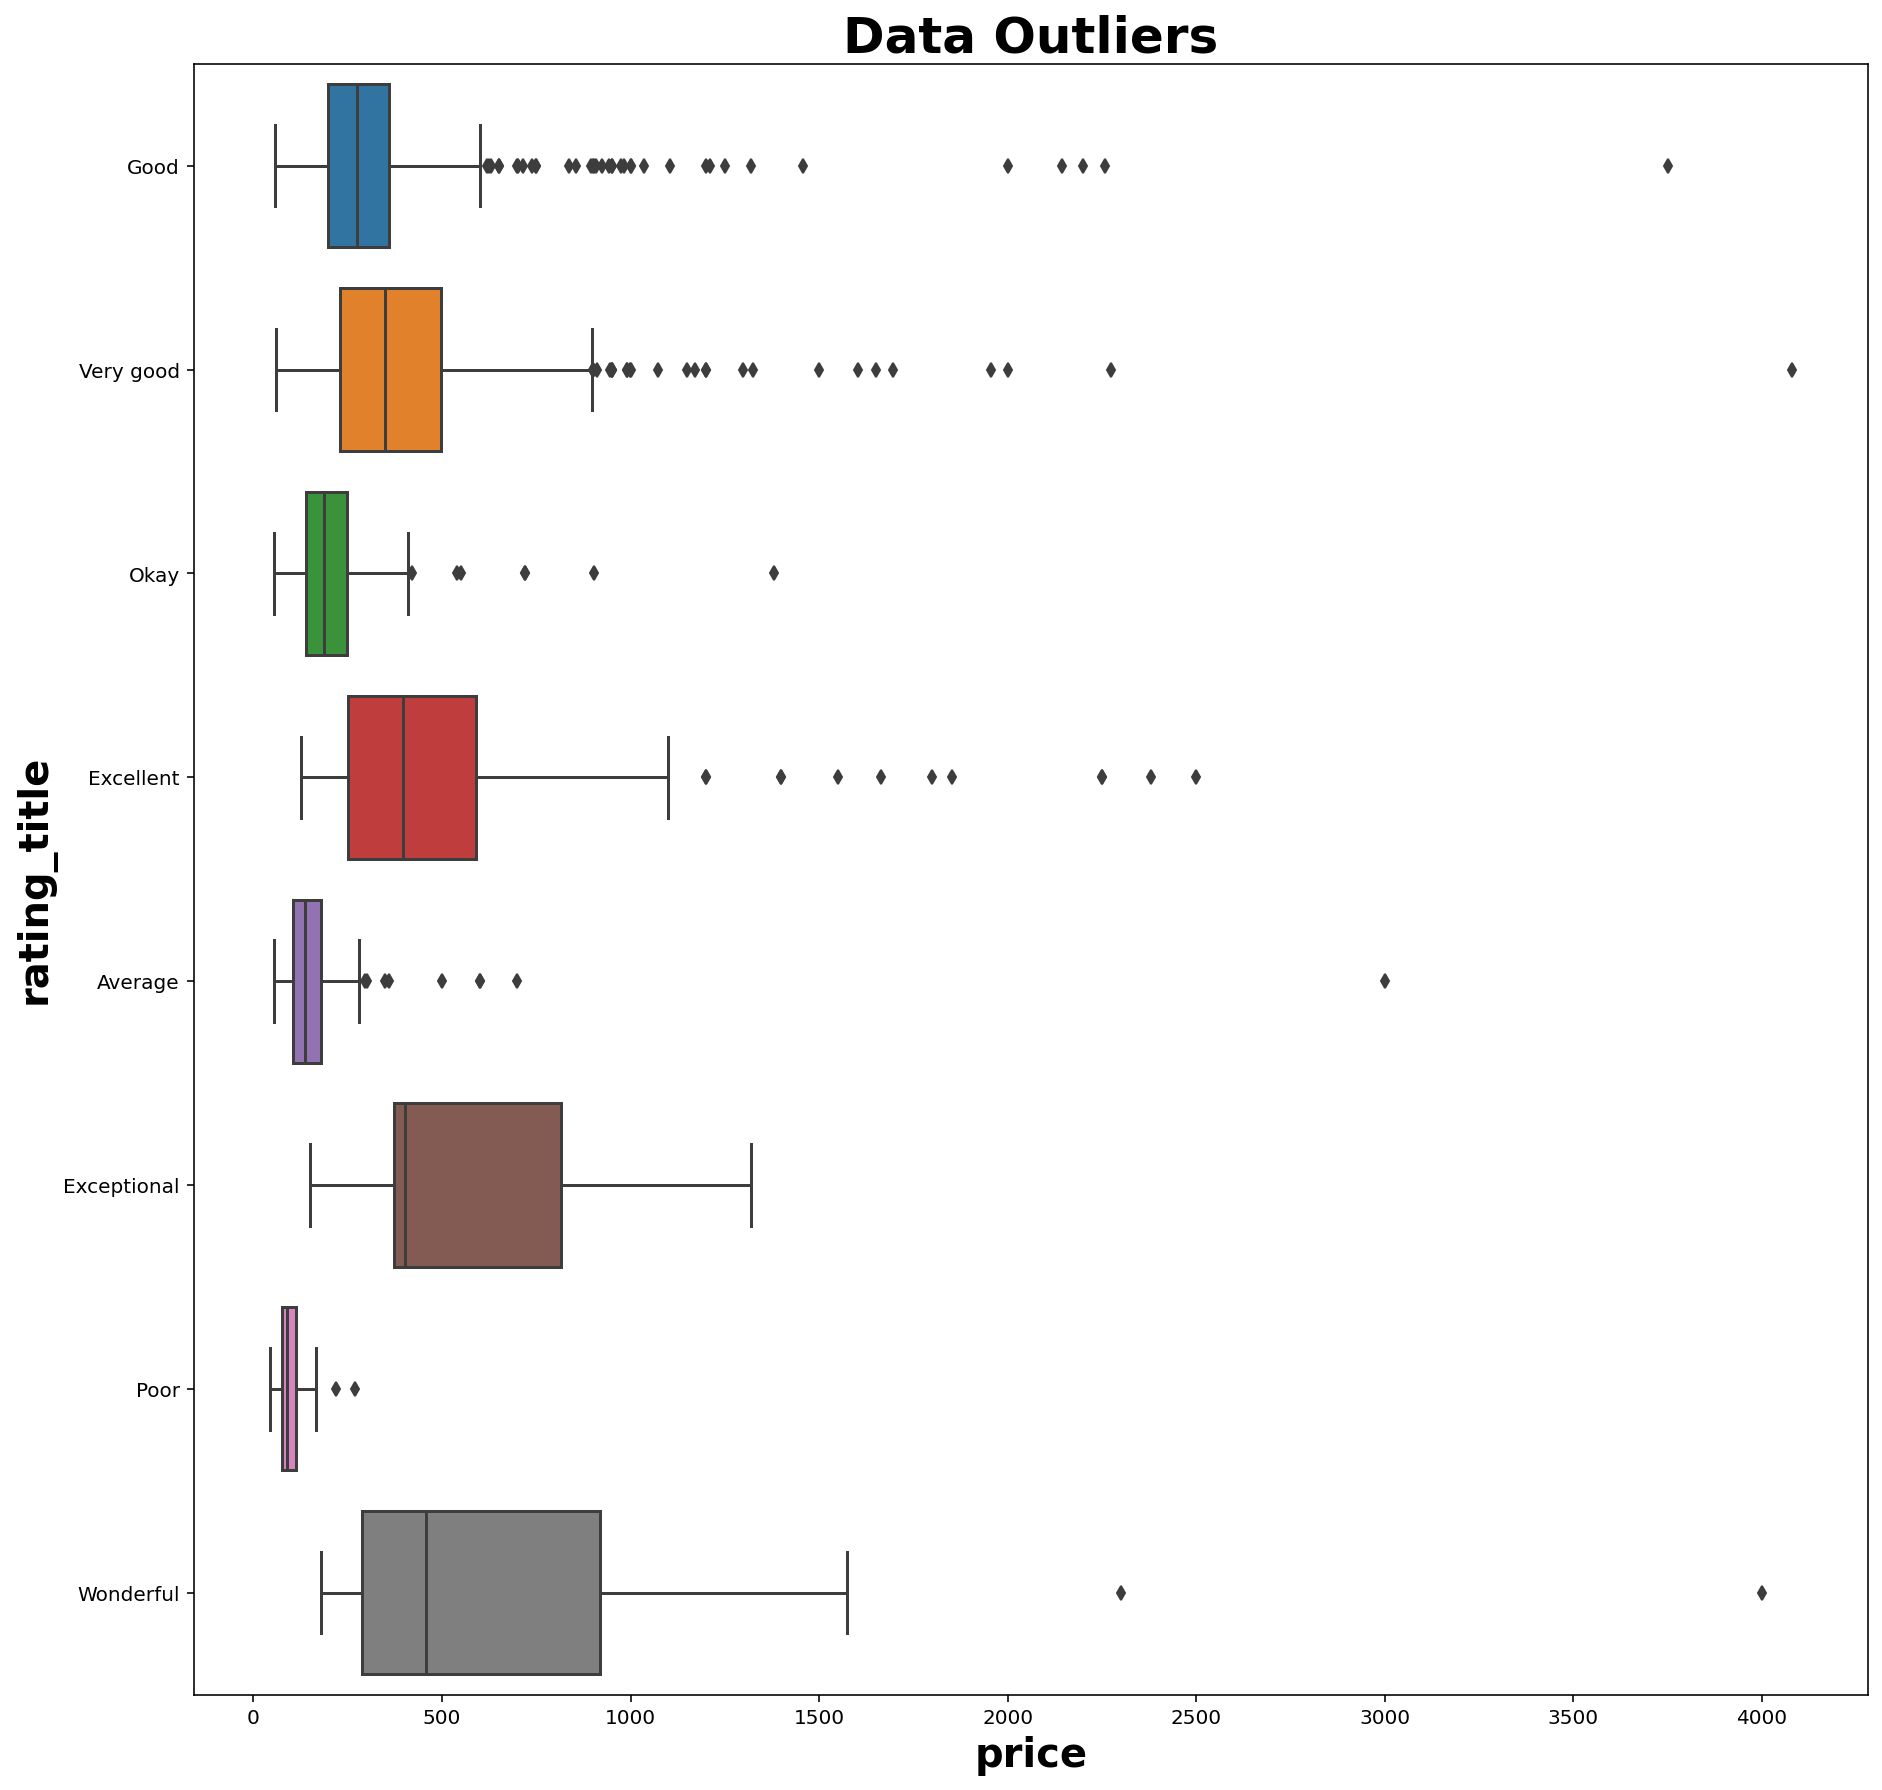

In [2540]:
plt.figure(figsize=(15,15))
plt.title('Data Outliers',fontsize = 25,loc='center',weight='bold');
cb=sns.boxplot(data=df_Hotels,y='rating_title',x='price')
cb.set_yticklabels(cb.get_yticklabels(),fontsize=10);
cb.set_xlabel('price',fontsize=20,weight='bold')
cb.set_ylabel('rating_title',fontsize=20,weight='bold');

In [2541]:
q1=df_Hotels.quantile(q=.25)
q2=df_Hotels.quantile(q=.75)
IQR=(q2-q1)
lower=q1-1.5*IQR
upper=q2+1.5*IQR 
df_clean = df_Hotels[((df_Hotels.price < lower.price) | (df_Hotels.price > upper.price))]
df_clean

,hotel_name,location,price,room_type,rating,rating_title,number_of_ratings
13,Grand Hyatt Alkhobar Hotel and Residences,Al Khobar,750,King Room,8.7,Excellent,2257
17,Le Meridien Riyadh,Riyadh,800,"Deluxe Room, Guest room, 2 Twin/Single Bed(s)",8.2,Very good,764
35,"Bay la sun , Luxury apartment with nice view",King Abdullah Economic City,950,Deluxe Family Suite with City View,8.5,Very good,99
57,REVERA RESORT,Madinah,850,Studio with Garden View,8.3,Very good,47
88,مزرعة بإطلالة على الجبل,Madain,1603,Family Room,8.5,Very good,15
...,...,...,...,...,...,...,...
343,Goot Resorts,Riyadh,2380,Premium One-Bedroom Villa with Private Pool,8.8,Excellent,161
351,Diva Chalet,Riyadh,2500,Two-Bedroom Chalet,8.8,Excellent,14
354,Davli Resort,Riyadh,1320,One-Bedroom Chalet,7.0,Good,6
355,شانتال Chantal,Riyadh,3000,Chalet,5.3,Average,4


In [2542]:
for col in df_Hotels.columns.to_list():
    num_uniq = df_Hotels[col].nunique()
    if num_uniq <= 10:
        uniq_list = df_Hotels[col].unique()
    else:
        uniq_list = 'more than 10'
    print(col, ':', num_uniq, ',', uniq_list)

hotel_name : 964 , more than 10
location : 80 , more than 10
price : 396 , more than 10
room_type : 252 , more than 10
rating : 59 , more than 10
rating_title : 8 , ['Good' 'Very good' 'Okay' 'Excellent' 'Average' 'Exceptional' 'Poor'
 'Wonderful']
number_of_ratings : 811 , more than 10


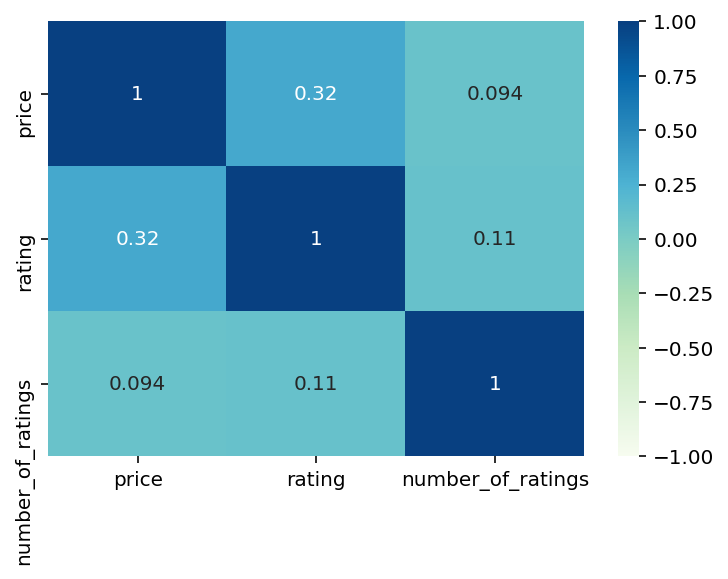

In [2543]:
sns.heatmap(df_Hotels.corr(), cmap="GnBu", annot=True, vmin=-1, vmax=1 );

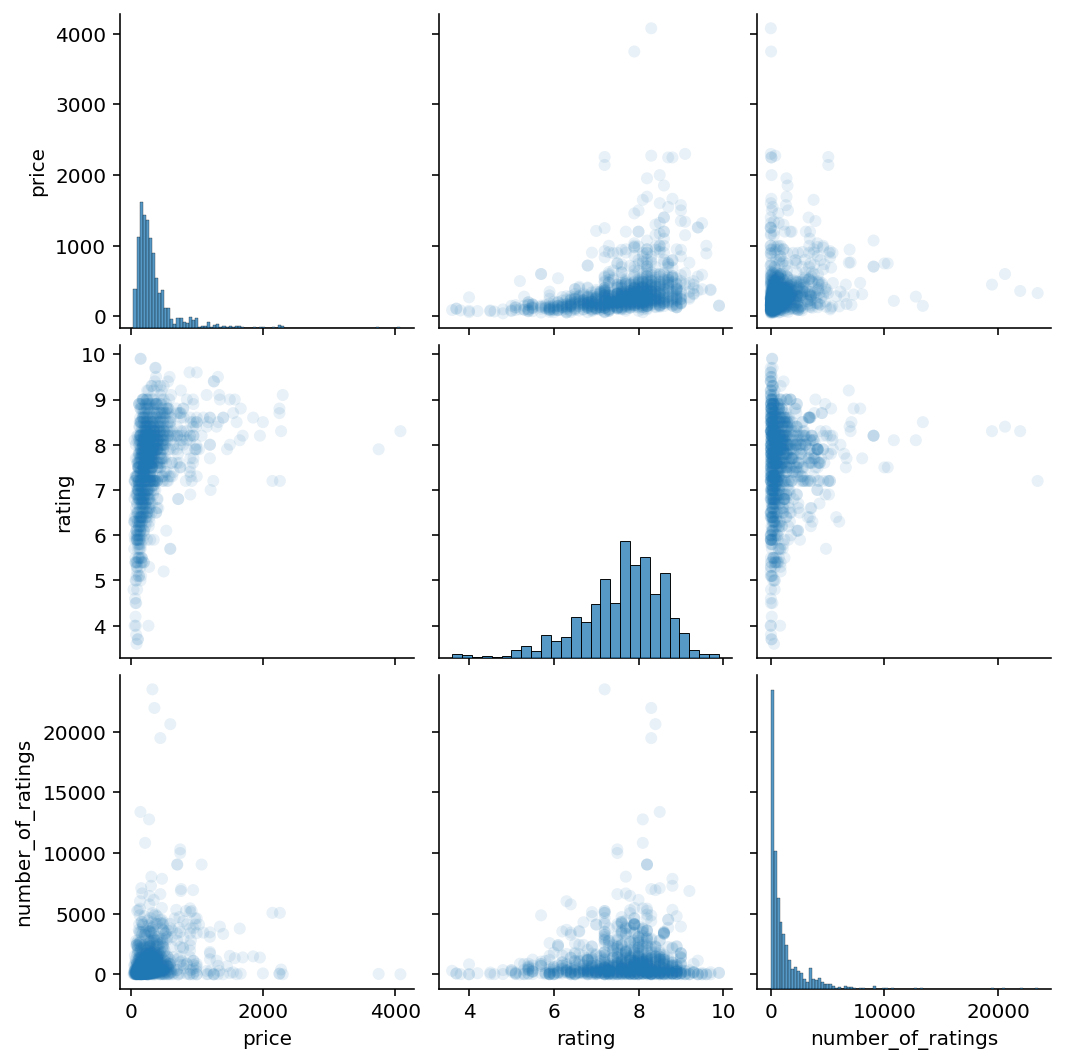

In [2544]:
sns.pairplot(df_Hotels[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

## <a name='baseline_model' style="color:#73C6B6;">Baseline Model</a>

In [2545]:
df_num=df_Hotels.select_dtypes(include=np.number).fillna(0)
X=df_num.drop("price",axis=1)
y=df_num[["price"]]

In [2546]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [2547]:
print ("shape of X =",X.shape)
print ("shape of y =",y.shape)
print ('shape of X_train =',X_train.shape)
print ('shape of X_val =',X_val.shape)
print ("shape of y_trian =",y_train.shape)
print ("shape of y_val =",y_val.shape)
print ('shape of X_test =',X_train.shape)
print ('shape of y_test =',y_train.shape)

shape of X = (1158, 2)
shape of y = (1158, 1)
shape of X_train = (926, 2)
shape of X_val = (232, 2)
shape of y_trian = (926, 1)
shape of y_val = (232, 1)
shape of X_test = (926, 2)
shape of y_test = (926, 1)


In [2548]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('train R^2 score was:' f'{lm.score(X_train,y_train)}')
print('Validation R^2 score was:' f'{lm.score(X_val,y_val)}')

train R^2 score was:0.09667325197338694
Validation R^2 score was:0.13080061397743903


## <a name='data_prep' style="color:#73C6B6;">Data Prep and Experimention</a>

In [2549]:
#exp1 dummy varibles
X1=X.copy()
X1['rating_title'] = df_Hotels['rating_title']
X_train , X_test , y_train , y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size=0.2, random_state=42)
    
dom_trin=pd.get_dummies(X_train)
dom_val=pd.get_dummies(X_val)
lm = LinearRegression()
lm.fit(dom_trin,y_train)
print('train R^2 score was:' f'{lm.score(dom_trin,y_train)}')
print('Validation R^2 score was:' f'{lm.score(dom_val,y_val)}')

train R^2 score was:0.12485659087113354
Validation R^2 score was:0.1024401952067292


In [2550]:
#exp2 count location 
X2=X1.copy()
location_count = df_Hotels['location'].value_counts()
X2['location_count_enc'] = df_Hotels['location'].map(location_count)
X_train , X_test , y_train , y_test = train_test_split(pd.get_dummies(X2), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(X2), y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)
print('train R^2 score was:' f'{lm.score(X_train,y_train)}')
print('Validation R^2 score was:' f'{lm.score(X_val,y_val)}')


train R^2 score was:0.1671136393208471
Validation R^2 score was:0.1325963900253495


In [2551]:
#exp3 polynomial equ
X3= X2.copy()

X3['squre Rating '] = X2['rating'] ** 2
X3['squre NOR'] = X2['number_of_ratings'] ** 2
X_train , X_test , y_train , y_test = train_test_split(pd.get_dummies(X3), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(X3), y, test_size=0.2, random_state=42)

    

lm = LinearRegression()
lm.fit(X_train,y_train)
print('train R^2 score was:' f'{lm.score(X_train,y_train)}')
print('Validation R^2 score was:' f'{lm.score(X_val,y_val)}')


train R^2 score was:0.16949187166368418
Validation R^2 score was:0.13293564337167751


In [2552]:
#exp4 groupby mean price per location 
X4=X3.copy()
price_means = df_Hotels.groupby('location')['price'].mean()
X3['location_mean'] = df_Hotels['location'].map(price_means)
X_train , X_test , y_train , y_test = train_test_split(pd.get_dummies(X4), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(X4), y, test_size=0.2, random_state=42)
    

lm = LinearRegression()
lm.fit(X_train,y_train)
print('train R^2 score was:' f'{lm.score(X_train,y_train)}')
print('Validation R^2 score was:' f'{lm.score(X_val,y_val)}')

train R^2 score was:0.16949187166368418
Validation R^2 score was:0.13293564337167751


In [2553]:
#exp5  feature engineering: adding interaction terms
X5 = X4.copy()

# multiplicative interaction
X5['m_Rating'] = X3['rating'] * X3['number_of_ratings']

# division interaction
X5['D_Rating'] = X3['rating'] / X3['number_of_ratings']
X_train , X_test , y_train , y_test = train_test_split(pd.get_dummies(X5), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(X5), y, test_size=0.2, random_state=42)
    

lm = LinearRegression()
lm.fit(X_train,y_train)
print('train R^2 score was:' f'{lm.score(X_train,y_train)}')
print('Validation R^2 score was:' f'{lm.score(X_val,y_val)}')

train R^2 score was:0.22597901795307673
Validation R^2 score was:0.17506688611631593


In [2554]:
#exp6 box cox 
X6=X5.copy()
X6['y_cox'] = power_transform(y,method='box-cox')
X_train , X_test , y_train , y_test = train_test_split(pd.get_dummies(X6), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(X6), y, test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('train R^2 score was:' f'{lm.score(X_train,y_train)}')
print('Validation R^2 score was:' f'{lm.score(X_val,y_val)}')

train R^2 score was:0.6436979205945255
Validation R^2 score was:0.6291251550929489


In [2555]:
#LASSO
X7=X6.copy()
X_train , X_test , y_train , y_test = train_test_split(pd.get_dummies(X7), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(X7), y, test_size=0.2, random_state=42)


In [2556]:
std = StandardScaler()
std.fit(X_train.values)
X_tri = std.transform(X_train.values)
X_val_std = std.transform(X_val.values)

In [2557]:
lasso_model = Lasso(alpha = 2) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train, y_train)
list(zip(X_train, lasso_model.coef_))

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24848383.29035954, tolerance: 13131.057626457885
  model = cd_fast.enet_coordinate_descent(


[('rating', -0.0),
 ('number_of_ratings', 0.03481727590900379),
 ('location_count_enc', -0.05666788869203477),
 ('squre Rating ', -3.5463471323920466),
 ('squre NOR', 1.258923444791355e-07),
 ('m_Rating', -0.0052268363766382765),
 ('D_Rating', 117.9074428653227),
 ('y_cox', 312.0211891627001),
 ('rating_title_Average', 0.0),
 ('rating_title_Excellent', 39.0968248713587),
 ('rating_title_Exceptional', -0.0),
 ('rating_title_Good', -44.31035660049515),
 ('rating_title_Okay', -34.713903758785186),
 ('rating_title_Poor', 0.0),
 ('rating_title_Very good', -2.6441941974827174),
 ('rating_title_Wonderful', 103.45820546162842)]

In [2558]:
print ("lasso model train scour =",f'{lasso_model.score(X_train, y_train)}')
print ("lasso model validation scour =",f'{lasso_model.score(X_val, y_val)}')

lasso model train scour = 0.6400145441796903
lasso model validation scour = 0.6313183102639464


In [2559]:
test_set_pred = lasso_model.predict(X_test)
print("predction lasso score = ",f"{r2_score(y_test, test_set_pred)}")


predction score =  0.6313183102639464


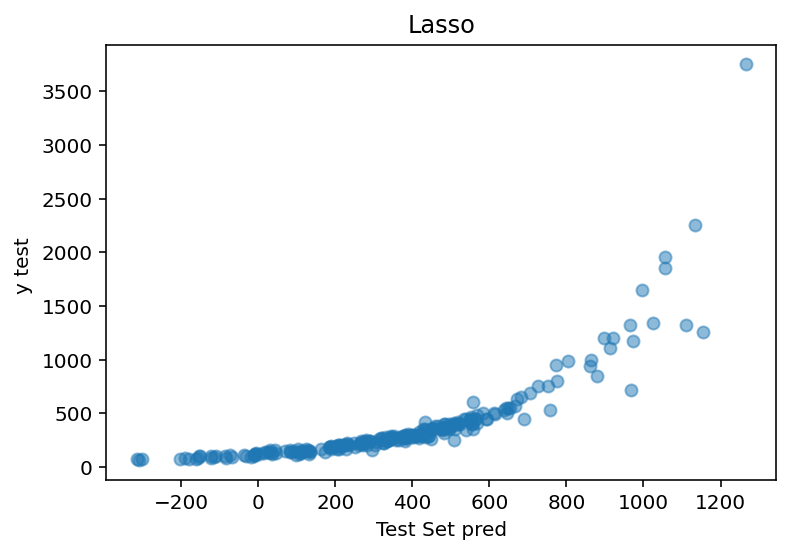

In [2560]:
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.xlabel('Test Set pred')
plt.ylabel('y test ')
plt.title('Lasso');


In [2582]:
#ridge
X8=X7.copy()

np.random.seed(6)
lr_model_ridge = Ridge(alpha = 6)
X_train , X_test , y_train , y_test = train_test_split(pd.get_dummies(X8), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(X8), y, test_size=0.2, random_state=42)

lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

C:\Users\abdol\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93927e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


[('rating', -40.91851258139782),
 ('number_of_ratings', 0.050390699823253816),
 ('location_count_enc', -0.05439775672821055),
 ('squre Rating ', -0.9082923101056543),
 ('squre NOR', 4.488521336562706e-08),
 ('m_Rating', -0.00694995446094447),
 ('D_Rating', 126.92678549129575),
 ('y_cox', 311.803787850235),
 ('rating_title_Average', -25.117642554752084),
 ('rating_title_Excellent', 39.42522088399485),
 ('rating_title_Exceptional', -24.087946376336095),
 ('rating_title_Good', -66.24015897838309),
 ('rating_title_Okay', -67.72995892308022),
 ('rating_title_Poor', 47.51070622264064),
 ('rating_title_Very good', -26.775043445125405),
 ('rating_title_Wonderful', 123.01482317103425)]

In [2583]:
print ("Ridge model train scour =",f'{lr_model_ridge.score(X_train, y_train)}')
print ("Ridge model validation scour =",f'{lr_model_ridge.score(X_val, y_val)}')

Ridge model train scour = 0.6432222521737656
Ridge model validation scour = 0.6313562996409972


In [2584]:
test_set_pred1 = lr_model_ridge.predict(X_test)

In [2585]:
print("predction score = ",f"{r2_score(y_val, test_set_pred1)}")


predction score =  0.6313562996409972


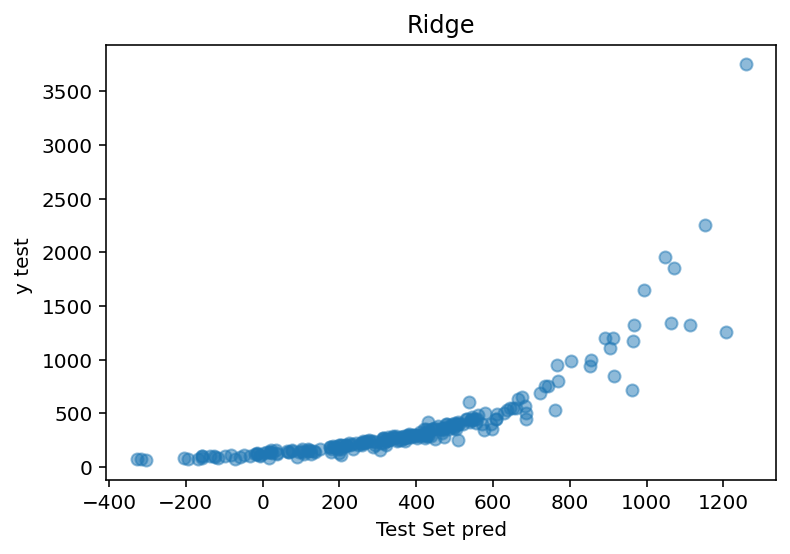

In [2586]:
plt.scatter(test_set_pred1, y_test, alpha=.5);
plt.xlabel('Test Set pred')
plt.ylabel('y test ')
plt.title('Ridge');

In [2566]:
from sklearn.model_selection import GridSearchCV

In [2567]:
#cross validation 
lasso_params = {'alpha':[10, 9, 8, 7, 5, 2]}
ridge_params = {'alpha':[1,2,3,4,5,6]}

In [2568]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5, scoring ='r2').fit(X_tr, y_train)

In [2569]:
lasso_grid.best_estimator_

Lasso(alpha=2)

In [2570]:
lasso_grid.best_score_

0.6405648885051861

In [2571]:
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params,cv=5, scoring ='r2').fit(X_tr, y_train)

In [2572]:
ridge_grid.best_estimator_

Ridge(alpha=6)

In [2573]:
ridge_grid.best_score_

0.6396462640562228

## <a name='conclusion' style="color:#73C6B6;">Conclusion</a>

In [2574]:
preds = lm.predict(X_test)

In [2575]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y_test,preds)

price    1.316065e+07
dtype: float64

In [2576]:
X_final = X8.copy()
final_model = Lasso(alpha = 2)
X_train , X_test , y_train , y_test = train_test_split(pd.get_dummies(X_final), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(X_final), y, test_size=0.2, random_state=42)
final_model.fit(X_train, y_train)
print ( "Best model trian score   =  ",f'{final_model.score(X_train, y_train)}')
print ( "Best model validation score  =  ",f'{final_model.score(X_val, y_val)}')
print ( "Best model test score  =  ",f'{final_model.score(X_test, y_test)}')

Best model trian score   =   0.6400145441796903
Best model validation score  =   0.6313183102639464
Best model test score  =   0.6313183102639464


C:\Users\abdol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24848383.29035954, tolerance: 13131.057626457885
  model = cd_fast.enet_coordinate_descent(


In [2577]:
import statsmodels.formula.api as smf
df1 = pd.DataFrame(pd.get_dummies(X_final))
df1["price"] = y 
X = df1.drop("price", axis = 1)
y = df1["price"]

model = smf.ols('y~X', data = df1)

fit1 = model.fit()# Fit the model

fit1.summary()# Print summary statistics of the model's performance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     136.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          7.88e-242
Time:                        14:57:16   Log-Likelihood:                -7926.1
No. Observations:                1158   AIC:                         1.588e+04
Df Residuals:                    1142   BIC:                         1.597e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    692.4103    564.857      1.226      0.221    -415.865    1800.685
X[0]         -17.9977    185.073     -0.097      0.923    -381.120     345.124
X[1]           0.0432      0.044      0.992      0.321      -0.042       0.129
X[2]          -0.0841      0.031     -2.714      0.007      -0.145      -0.023
X[3]          -3.7685     13.007     -0.290      0.772     -29.289      21.752
X[4]        5.619e-08   4.36e-07      0.129      0.897   -7.99e-07    9.11e-07
X[5]          -0.0060      0.006     -1.089      0.276      -0.017       0.005
X[6]         131.5486     26.819      4.905      0.000      78.928     184.169
X[7]         323.8160      8.805     36.776      0.000     306.540     341.092
X[8]          42.3680     88.369      0.479      0.632    -131.016     215.752
X[9]         139.5322     95.334      1.464      0.144     -47.518     326.582
X[10]        113.2619    109.127      1.038      0.300    -100.851     327.374
X[11]          7.6840    109.405      0.070      0.944    -206.973     222.341
X[12]          1.2905    106.371      0.012      0.990    -207.413     209.995
X[13]        124.1111     79.820      1.555      0.120     -32.500     280.722
X[14]         54.9144    102.483      0.536      0.592    -146.162     255.991
X[15]        209.2482     93.723      2.233      0.026      25.359     393.138
==============================================================================
Omnibus:                     1249.173   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102925.850
Skew:                           5.163   Prob(JB):                         0.00
Kurtosis:                      48.017   Cond. No.                     1.09e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.69e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""